In this tutorial, we quickly generate some Modules for Experiments in Stellar Astrophysics (MESA) Stellar Tracks! We will watch a population of stars evolve from the pre-main-sequence (pMS) to the zero-age-main-sequence (ZAMS) and we will evolve them once more to the end of their hydrogen core-burning phase of evolution. 

In [1]:
import pandas as pd 
import numpy as np
import camber, os
import smplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import mesa_reader as mr

We begin by defining a simple function to create an ensemble of stellar tracks, ranging in mass from m1-m2 with an interval size dm.

In [2]:
def create_table(m1, m2, dm):
    # Calculate the number of intervals
    num_intervals = int((m2 - m1) / dm) + 1    
    # Generate the values based on the intervals
    values = [m1 + i * dm for i in range(num_intervals)]
    # Generate ZAMS file names
    zams_file = [f"{val}Msun_zams.mod" for val in values]
    hcore_file = [f"{val}Msun_hcore.mod" for val in values]
    #outdir= [f"{val}Msun" for val in values]
    # Create a DataFrame
    df = pd.DataFrame({'mass': values, 'zams_file':zams_file,'hcore_file':hcore_file})
    return df

Let's range between 1-2 Msun with an interval of 0.5 Msun. 

In [3]:
m1=1.0
m2=5
dm=0.25
df = create_table(m1,m2,dm)
df

,mass,zams_file,hcore_file
0,1.00,1.0Msun_zams.mod,1.0Msun_hcore.mod
1,1.25,1.25Msun_zams.mod,1.25Msun_hcore.mod
2,1.50,1.5Msun_zams.mod,1.5Msun_hcore.mod
3,1.75,1.75Msun_zams.mod,1.75Msun_hcore.mod
4,2.00,2.0Msun_zams.mod,2.0Msun_hcore.mod
5,2.25,2.25Msun_zams.mod,2.25Msun_hcore.mod
6,2.50,2.5Msun_zams.mod,2.5Msun_hcore.mod
7,2.75,2.75Msun_zams.mod,2.75Msun_hcore.mod
8,3.00,3.0Msun_zams.mod,3.0Msun_hcore.mod
9,3.25,3.25Msun_zams.mod,3.25Msun_hcore.mod


Let's start by generating ZAMS stars from pMS collapse. To generate a ZAMS star, you will need to specify an inlist that includes the function "create_pre_main_sequence_model = .true." My inlist is called "inlist_create_zams".

In [4]:
jobs = camber.mesa.create_scatter_job(
    param_sets=[
        {
            "INLIST": "'inlist_create_zams'",
            "OUTPUT_MOD": '"' + str(row['zams_file']) + '"',  # Add extra quotes around the value
            "INIT_MASS": str(row['mass'])
        }
        for _, row in df.iterrows()
    ],
    inlist_files = ['inlist','inlist_create_zams'],
    worker_size='SMALL'
)
jobs

[MesaJob({"job_id": 1805, "status": "PENDING", "worker_size": "SMALL", "job_type": "MESA", "command": "./mk && ./rn", "file_dir": "0009", "with_gpu": false, "tags": null}),
 MesaJob({"job_id": 1813, "status": "PENDING", "worker_size": "SMALL", "job_type": "MESA", "command": "./mk && ./rn", "file_dir": "0017", "with_gpu": false, "tags": null}),
 MesaJob({"job_id": 1807, "status": "PENDING", "worker_size": "SMALL", "job_type": "MESA", "command": "./mk && ./rn", "file_dir": "0011", "with_gpu": false, "tags": null}),
 MesaJob({"job_id": 1809, "status": "PENDING", "worker_size": "SMALL", "job_type": "MESA", "command": "./mk && ./rn", "file_dir": "0013", "with_gpu": false, "tags": null}),
 MesaJob({"job_id": 1797, "status": "PENDING", "worker_size": "SMALL", "job_type": "MESA", "command": "./mk && ./rn", "file_dir": "0001", "with_gpu": false, "tags": null}),
 MesaJob({"job_id": 1803, "status": "PENDING", "worker_size": "SMALL", "job_type": "MESA", "command": "./mk && ./rn", "file_dir": "0007

This takes just a few minutes. Just like that we created all our ZAMS files! A final ZAMS model is created in each of the respective directories. It is appended with "zams.mod".

These zams mod files are the requisite input files to evolve our stars from ZAMS to the next stage of evolution (H-core burning in our case). Let's move these files to our main directory.

In [24]:
!find /home/melinda -maxdepth 1 -type d -name "00*" -exec sh -c 'cp "$1"/*.mod /home/melinda/' sh {} \;

Let's remove the old directories, as they are no longer needed.

In [26]:
!rm -r 00*

Now let's evolve each of our ZAMS stellar tracks along the H-core burning sequence.

In [27]:
param_sets=[
    {   
        "INLIST": "'inlist_hcoreburning'",
        "INPUT_MOD": '"' + str(row['zams_file']) + '"',  # Add extra quotes around the value
        "INIT_MASS": str(row['mass']),
        "OUTPUT_MOD": '"' + str(row['hcore_file']) + '"',  # Add extra quotes around the value
    }
    for _, row in df.iterrows()]
param_sets

[{'INLIST': "'inlist_hcoreburning'",
  'INPUT_MOD': '"1.0Msun_zams.mod"',
  'INIT_MASS': '1.0',
  'OUTPUT_MOD': '"1.0Msun_hcore.mod"'},
 {'INLIST': "'inlist_hcoreburning'",
  'INPUT_MOD': '"1.25Msun_zams.mod"',
  'INIT_MASS': '1.25',
  'OUTPUT_MOD': '"1.25Msun_hcore.mod"'},
 {'INLIST': "'inlist_hcoreburning'",
  'INPUT_MOD': '"1.5Msun_zams.mod"',
  'INIT_MASS': '1.5',
  'OUTPUT_MOD': '"1.5Msun_hcore.mod"'},
 {'INLIST': "'inlist_hcoreburning'",
  'INPUT_MOD': '"1.75Msun_zams.mod"',
  'INIT_MASS': '1.75',
  'OUTPUT_MOD': '"1.75Msun_hcore.mod"'},
 {'INLIST': "'inlist_hcoreburning'",
  'INPUT_MOD': '"2.0Msun_zams.mod"',
  'INIT_MASS': '2.0',
  'OUTPUT_MOD': '"2.0Msun_hcore.mod"'},
 {'INLIST': "'inlist_hcoreburning'",
  'INPUT_MOD': '"2.25Msun_zams.mod"',
  'INIT_MASS': '2.25',
  'OUTPUT_MOD': '"2.25Msun_hcore.mod"'},
 {'INLIST': "'inlist_hcoreburning'",
  'INPUT_MOD': '"2.5Msun_zams.mod"',
  'INIT_MASS': '2.5',
  'OUTPUT_MOD': '"2.5Msun_hcore.mod"'},
 {'INLIST': "'inlist_hcoreburning'",
  

In [29]:
zams_mod_files = [file for file in os.listdir("./") if file.endswith("zams.mod")]
zams_mod_files=sorted(zams_mod_files)

In [30]:
jobs = camber.mesa.create_scatter_job(
    param_sets=[
        {   "INLIST": "'inlist_hcoreburning'",
            "INPUT_MOD":str(row['zams_file']),
            "OUTPUT_MOD": str(row['hcore_file']),
            "INIT_MASS": str(row['mass'])
        }
        for _, row in df.iterrows()
    ],
    inlist_files = ['inlist','inlist_hcoreburning'],
    model_files=zams_mod_files,
    worker_size='SMALL'
)
jobs

[MesaJob({"job_id": 1817, "status": "PENDING", "worker_size": "SMALL", "job_type": "MESA", "command": "./mk && ./rn", "file_dir": "0004", "with_gpu": false, "tags": null}),
 MesaJob({"job_id": 1829, "status": "PENDING", "worker_size": "SMALL", "job_type": "MESA", "command": "./mk && ./rn", "file_dir": "0016", "with_gpu": false, "tags": null}),
 MesaJob({"job_id": 1828, "status": "PENDING", "worker_size": "SMALL", "job_type": "MESA", "command": "./mk && ./rn", "file_dir": "0015", "with_gpu": false, "tags": null}),
 MesaJob({"job_id": 1823, "status": "PENDING", "worker_size": "SMALL", "job_type": "MESA", "command": "./mk && ./rn", "file_dir": "0010", "with_gpu": false, "tags": null}),
 MesaJob({"job_id": 1814, "status": "RUNNING", "worker_size": "SMALL", "job_type": "MESA", "command": "./mk && ./rn", "file_dir": "0002", "with_gpu": false, "tags": null}),
 MesaJob({"job_id": 1824, "status": "PENDING", "worker_size": "SMALL", "job_type": "MESA", "command": "./mk && ./rn", "file_dir": "0011

This too takes just a few minutes to complete, but you can start plotting as soon as your files begin to be generated.

Awesome, let's plot our results now that it is all done! 

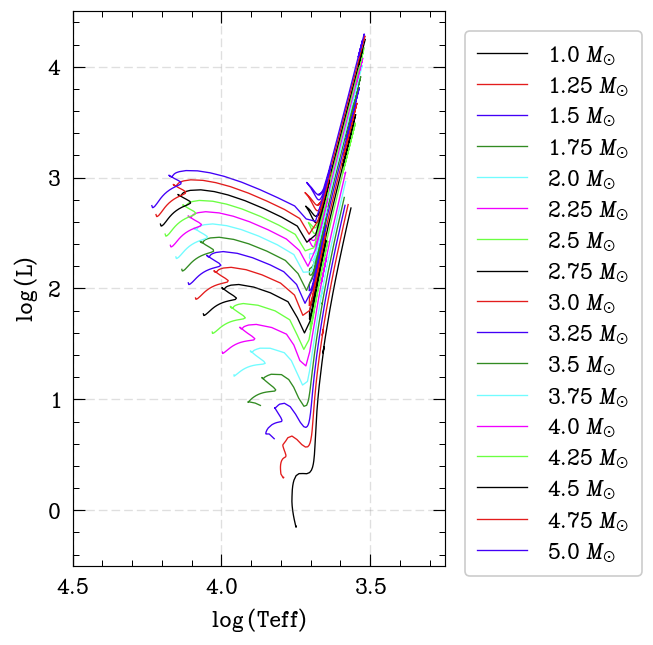

In [51]:
fig = plt.figure(figsize=(4,6))
maxx=4.5
minx=3.25
miny=-0.5
maxy=4.5

dirs = sorted([file for file in os.listdir("./") if file.startswith("00")])
for d in dirs:
    h=mr.MesaData(str(d)+'/LOGS/history.data')
    plt.plot(h.log_Teff,h.log_L,linewidth=0.8,zorder=1,label=str(round(h.star_mass[0],4))+' $M_{\odot}$')
plt.xlim(maxx,minx)
plt.ylim(miny,maxy)
plt.grid(alpha=0.25)
plt.legend(frameon=True,bbox_to_anchor=(1, 1))
plt.xlabel('$\log$(Teff)')
plt.ylabel('$\log$(L)')
plt.show()